In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [232]:
def golden_section_search(f, a, b, n_max=500, tol=1.0e-8):
    """
    Finds the minimum of function using golden section search.
    Args:
        f (array_like): a strictly unimodal function on [a,b]
        a (float): left-hand side point of the interval
        b (float): right-hand side point of the interval
    Returns:
        float: a coordinate of minimum
    """
    gr = (np.sqrt(5) + 1.0) / 2.0
    n = 0
    while n <= n_max:
        c = b - (b - a) / gr
        d = a + (b - a) / gr 
        if abs(c - d) < tol:
            return (b + a) / 2.0
        if f(c) < f(d):
            b = d
        else:
            a = c
        n += 1
    raise RuntimeError('minimum not found using', n_max, 'iterations')

1.00000001825 2.0


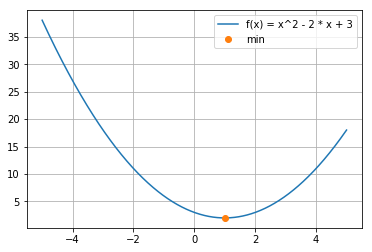

In [233]:
def f(x):
    return x**2 - 2 * x + 3

min = golden_section_search(f, -5.0, 5.0)
print(min, f(min))

x = np.linspace(-5.0, 5.0, 1000)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, f(x), label='f(x) = x^2 - 2 * x + 3')
ax.plot(min, f(min), 'o', label='min')
ax.legend()
ax.grid()

In [241]:
def parabolic_interpolation_search(f, a, b, c, tol=1.0e-8):
    if (f(a) > f(b) and f(b) > f(c)) or (f(a) < f(b) and f(b) < f(c)):
        raise RuntimeError('')
    x_min = b + 0.5 * ((f(a) - f(b)) * (c - b)**2 - (f(c) - f(b)) * (b - a)**2) \
    / ((f(a) - f(b)) * (c - b) + (f(c) - f(b)) * ( b - a))
    if abs(x_min - b) < tol: return b
    if x_min < b:
        return parabolic_interpolation(f, a, x_min, b)
    elif x_min > b:
        return parabolic_interpolation(f, b, x_min, c)
    else:
        return parabolic_interpolation(f, a, a + np.random.rand(1) / abs(c - a), c)

1.0 2.0


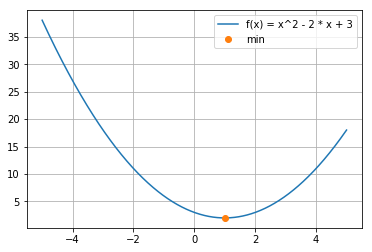

In [242]:
def f(x):
    return x**2 - 2 * x + 3

min = parabolic_interpolation_search(f, -5.0, 0.0, 5.0)
print(min, f(min))

x = np.linspace(-5.0, 5.0, 1000)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, f(x), label='f(x) = x^2 - 2 * x + 3')
ax.plot(min, f(min), 'o', label='min')
ax.legend()
ax.grid()

In [280]:
def lagrange_interpolation(x, y):
    """
    Calculates a Lagrange interpolating polynomial.
    Args:
        x (array_like): X-coordinates of a set of datapoints
        y (array_like): Y-coordinates of a set of datapoints
    Returns:
        numpy.poly1d: The Lagrange interpolating polynomial
    """
    n = len(x)
    L = np.poly1d(0)
    for i in range(n):
        F = np.poly1d(1)
        for j in range(n):
            if j == i:
                continue
            F *= np.poly1d([1., -x[j]]) / (x[i] - x[j])
        L += y[i] * F
    return L

In [281]:
def parabolic_interpolation_search2(f, x, n_max=500, tol=1.0e-8):
    n = 0
    while n <= n_max:
        #poly = np.polyfit(x, f(x), 2)
        #x_min = -poly[1] / (2.0 * poly[0])
        poly = lagrange_interpolation(x, f(x))
        x_min = -poly[1] / (2.0 * poly[2])
        x[0] = x[1]
        x[1] = x[2]
        x[2] = x_min
        if abs(x[2] - x[1]) / abs(x[2]) < tol:
            return x[2]
        n += 1
    raise RuntimeError('minimum not found using', n_max, 'iterations')

3.75629835562 -16.0394834903


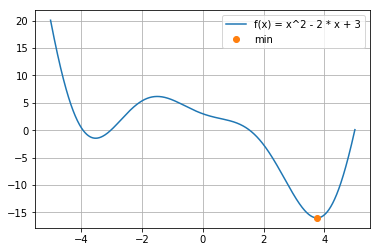

In [282]:
def f(x):
    return x**2 * np.cos(x) - 2 * x + 3

points = np.array([-1.0, 3.0, 5.0])

min = parabolic_interpolation_search2(f, points)
print(min, f(min))

x = np.linspace(-5.0, 5.0, 1000)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, f(x), label='f(x) = x^2 - 2 * x + 3')
ax.plot(min, f(min), 'o', label='min')
ax.legend()
ax.grid()

In [ ]:
def nelder_mead_mead():
    # add code here
    return:

In [283]:
def conjugate_gradient_method():
    # add code here
    return